# Small classification demo using the Iris dataset
This is a small demo of a typical classification task in machine learning. In classification problems, data is labeled so that each datapoint belongs to exactly one of several classes. The challenge is to find a way to partition the feature space so that the label of a data point can be predicted from its features with high certainty. This is done using some machine learning-based classifier.

In this demo, the famous [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) will be used. In this dataset 50 datapoints from each of three species of Iris are recorded. Each datapoint contains the measurements of length and width of the petals and sepals of an Iris, together with the corresponding species label. The task is to use the length and width measurements to predict the correct species.

Before starting, lets do some imports which will be used through the demo. [Scikit-learn](http://scikit-learn.org/stable/#) will be used for the machine learning modeling, [Matplotlib](https://matplotlib.org/) for plotting and [NumPy](http://www.numpy.org/) for some numerical auxiliary functions.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

Next, it's time to import the data. This is done using a built-in helper function in Scikit-learn, which will download the dataset the first time it's run. After that, the features (length and width measurements for petals and sepals, a total of four features for each observation) will be assigned to `X`, and the corresponding labels (Iris species) to `y`.

The dataset is then split into a training part and testing part. During the model training, only the training dataset will be used. The model is then evaluated using the test dataset. This is done to ensure that the model output generalizes well to data it has not seen before, but is still similar to the training data, and to ensure that the model is not overfitted to the training data.

In [15]:
# Import data
iris_data = load_iris()

X = iris_data.data
y = iris_data.target

# Split dataset into training set and testing set
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

Next, the classifier is declared and trained. Here, a [multinomial logistic regression model](https://en.wikipedia.org/wiki/Multinomial_logistic_regression) is used. This is a very commonly used linear classifier and something that should almost always be tested before attempting more advanced and complex methods.

In this case, the classifier is only trained to use information from two features: sepal width and length. This is done purely for pedagogical reasons. Using only two features allows the output from the classifier to be visualized in a simple way. The datapoints from the training dataset are plotted in a figure, together with the decision boundaries of the classifier after training it. We can see that it correctly divides the feature space in regions rougly corresponding to data of a certain label. We also print out the score of the classifier when evaluating it on the test data. It achieves a score of 0.84, meaning that we're doing fairly well on the test data.

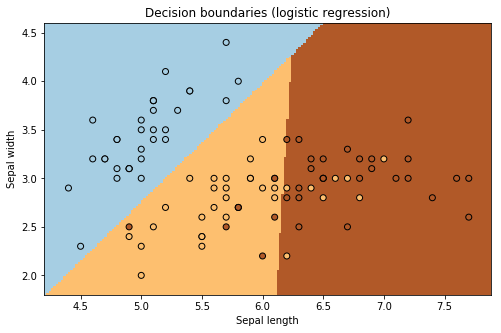

Score (logistic regression):  0.78


In [16]:
# Classifying using only two dimensional feature vector
classifier_logreg = LogisticRegression(C=1e5, multi_class = 'multinomial', solver = 'lbfgs')
classifier_logreg.fit(X_train[:, :2], y_train)


# Plot decision boundaries. Code below based on http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html.
# Code by Gaël Varoquaux
# License: BSD 3-clause
x1_lower, x1_upper = min(X_train[:, 0]) - 0.2, max(X_train[:, 0]) + 0.2
x2_lower, x2_upper = min(X_train[:, 1]) - 0.2, max(X_train[:, 1]) + 0.2
grid_size = 0.02
xx1, xx2 = np.meshgrid(np.arange(x1_lower, x1_upper, grid_size), np.arange(x2_lower, x2_upper, grid_size))
predictions = classifier_logreg.predict(np.c_[xx1.ravel(), xx2.ravel()])

plt.figure(1, figsize=(8, 5))
plt.pcolormesh(xx1, xx2, predictions.reshape(xx1.shape), cmap = plt.cm.Paired)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, edgecolors = 'k', cmap = plt.cm.Paired)
plt.title('Decision boundaries (logistic regression)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.show()


# Evaluate classifiers predictive performance
score_logreg = classifier_logreg.score(X_test[:, :2], y_test)
print('Score (logistic regression): ', score_logreg)

Finally, an identical classifier is trained using the full feature set. Since this classifier has access to more information from the dataset, we can expect it to perform better on the test data. This is confirmed by a higher score of 0.98, almost perfect result. A drawback is that the ability to visualize the classifier output is lost.

In [17]:
# Redo training using full feature set
classifier_logreg_full = LogisticRegression(C=1e5, multi_class = 'multinomial', solver = 'lbfgs')
classifier_logreg_full.fit(X_train, y_train)

# Evaluate classifiers predictive performance
score_logreg = classifier_logreg_full.score(X_test, y_test)
print('Score (logistic regression): ', score_logreg)

Score (logistic regression):  0.96
